In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readfile(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    starting_time = float(lines[0].strip())
    frequency = float(lines[1].strip())
    data = [float(x.strip()) for x in lines[2:]]

    return data, starting_time, frequency


def loaddata(term, type):
    starting_time=[]
    data=[]
    frequency=[]
    for i in range(1,11):
        d, start_time, freq = readfile(f"C:\\Users\\Dignity\\Documents\\Data\\S{i}\{term}\\EDA.csv")
        data.append(d)
        starting_time.append(start_time)
        frequency.append(freq)

    latest_start = max(starting_time)
    starting_index = []
    for i, start_time in enumerate(starting_time):
        starting_index.append(int((latest_start - start_time) * frequency[i]))
    
    for i in range(len(data)):
        data[i]=data[i][starting_index[i]:]

    shortest_len = min([len(x) for x in data])
    for i in range(len(data)):
        data[i]=data[i][:shortest_len]

    return np.array(data)
    
    

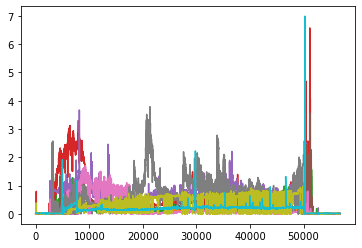

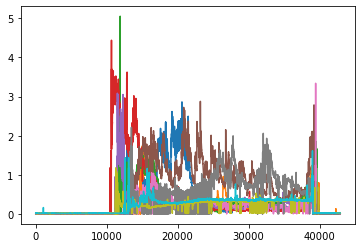

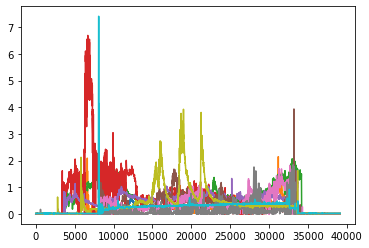

In [3]:
measure='TEMP'
data={}

data['Final']=loaddata('Final', measure)
plt.figure()
plt.plot(np.array(data['Final']).T)


data['M1']=loaddata('Midterm 1', measure)
plt.figure()
plt.plot(np.array(data['M1']).T)


data['M2']=loaddata('Midterm 2', measure)
plt.figure()
plt.plot(np.array(data['M2']).T)

In [4]:
names=['Final','M1','M2']
for x in names:
    print(data[x].shape)

(10, 56826)
(10, 42910)
(10, 39162)


In [5]:
data['Final']

array([[0.024345, 0.023064, 0.024345, ..., 0.023064, 0.024345, 0.023064],
       [0.017939, 0.01922 , 0.020501, ..., 0.012813, 0.014095, 0.014095],
       [0.005126, 0.005126, 0.005126, ..., 0.      , 0.001281, 0.      ],
       ...,
       [0.011533, 0.00897 , 0.00897 , ..., 0.003844, 0.002563, 0.002563],
       [0.      , 0.001281, 0.014095, ..., 0.011532, 0.011532, 0.012813],
       [0.021781, 0.016656, 0.019219, ..., 0.016656, 0.019219, 0.019219]])

No handles with labels found to put in legend.


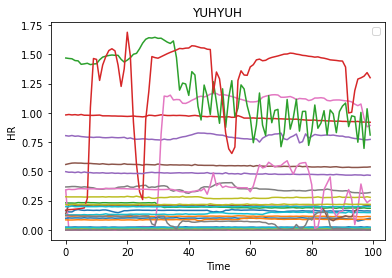

In [6]:
plt.plot(np.array(data['Final'][:,10100:10200]).T)
plt.plot(np.array(data['M1'][:,10100:10200]).T)
plt.plot(np.array(data['M2'][:,10100:10200]).T)
plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xlabel("Time")
plt.ylabel("HR")
plt.title("YUHYUH")
plt.show()

No handles with labels found to put in legend.


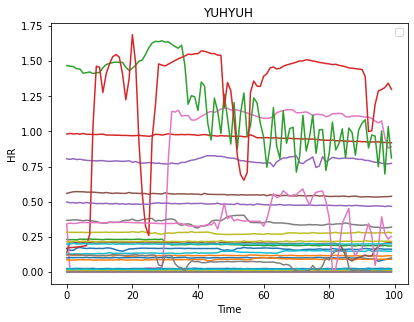

In [7]:
plt.plot(np.array(data['Final'][:,10100:10200]).T)
plt.plot(np.array(data['M1'][:,10100:10200]).T)
plt.plot(np.array(data['M2'][:,10100:10200]).T)
plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.xlabel("Time")
plt.ylabel("HR")
plt.title("YUHYUH")
plt.show()

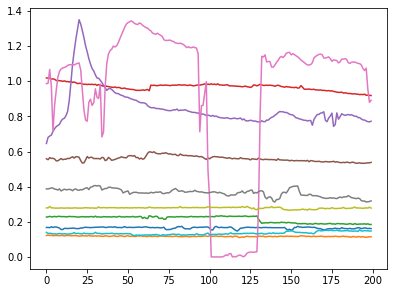

In [8]:
plt.plot(data['Final'][:, 10000:10200].T)

In [9]:
for i in range(0, data['Final'].shape[1], 100):
    chunk = data['Final'][:, i:i+200]

In [10]:
finalList = data['Final'].tolist()
finalList1 = data['M1'].tolist()
finalList2 = data['M2'].tolist()

In [11]:
finalList=pd.DataFrame(data['Final']).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalList.csv")
midterm1=pd.DataFrame(data['M1']).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalMidterm1.csv")
midterm2=pd.DataFrame(data['M2']).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalMidterm2.csv")

In [12]:
df1=pd.read_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalMidterm1.csv",nrows=1)
df2=pd.read_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalMidterm2.csv",nrows=1)
df=pd.read_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalList.csv",nrows=1)

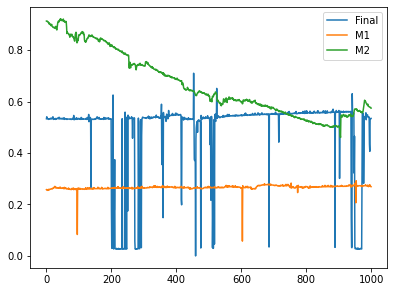

In [26]:
subject_id = 8

legend=[]
for key, value in data.items():
    plt.plot(value[subject_id, 20000:21000])
    legend.append(key)

plt.legend(legend)


In [14]:
meanFinal=data['Final'].mean(axis=0)
meanFinal
stdevFinal=data['Final'].std(axis=0)
stdevFinal

array([0.00874303, 0.00774755, 0.00771438, ..., 0.00802634, 0.00866758,
       0.00859627])

In [15]:
meanM1=data['M1'].mean(axis=0)
stdevM1=data['M1'].std(axis=0)

In [16]:
meanM2=data['M2'].mean(axis=0)
stdevM2=data['M2'].std(axis=0)

In [17]:
meanStudentsM1= data['M1']-meanM1
normalizedFinal=meanStudentsM1/stdevM1
pd.DataFrame(normalizedFinal).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\normalizedHRM1.csv")

In [18]:
meanStudentsM1= data['M2']-meanM2
normalizedFinal=meanStudentsM1/stdevM2
pd.DataFrame(normalizedFinal).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\normalizedHRM2.csv")

In [19]:
meanStudentsM1= data['Final']-meanFinal
normalizedFinal=meanStudentsM1/stdevFinal
pd.DataFrame(normalizedFinal).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\normalizedHRFinal.csv")

<function matplotlib.pyplot.show(close=None, block=None)>

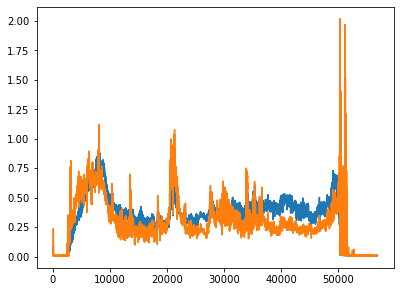

In [20]:
plt.plot(meanFinal)
plt.plot(stdevFinal)
plt.show

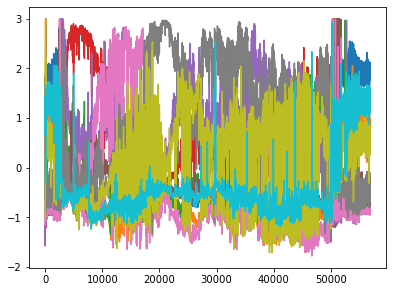

In [21]:
meanStudentsFinal= data['Final']-meanFinal
normalizedFinal=meanStudentsFinal/stdevFinal
#plt.plot(meanStudentsFinal.T)
plt.plot(normalizedFinal.T)

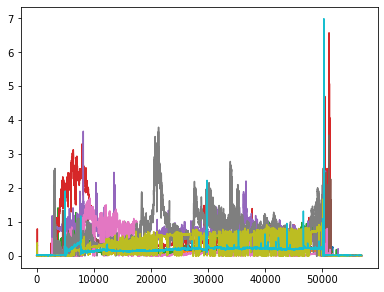

In [22]:
plt.plot(data['Final'].T)

In [23]:
finalList=pd.DataFrame(data['Final']).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalList.csv")
midterm1=pd.DataFrame(data['M1']).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalMidterm1.csv")
midterm2=pd.DataFrame(data['M2']).to_csv(f"C:\\Users\\Dignity\\Documents\\Data\\Finals\\finalMidterm2.csv")

In [24]:
import sklearn